In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
color = sns.color_palette()

In [13]:
df = pd.read_csv('./Datasets/bitcoin_price.csv', parse_dates=['Date'])

In [14]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-09-05,4228.29,4427.84,3998.11,4376.53,"2,697,970,000","69,954,400,000"
1,2017-09-04,4591.63,4591.63,4108.40,4236.31,"2,987,330,000","75,955,500,000"
2,2017-09-03,4585.27,4714.08,4417.59,4582.96,"1,933,190,000","75,841,700,000"
3,2017-09-02,4901.42,4975.04,4469.24,4578.77,"2,722,140,000","81,060,600,000"
4,2017-09-01,4701.76,4892.01,4678.53,4892.01,"2,599,080,000","77,748,400,000"


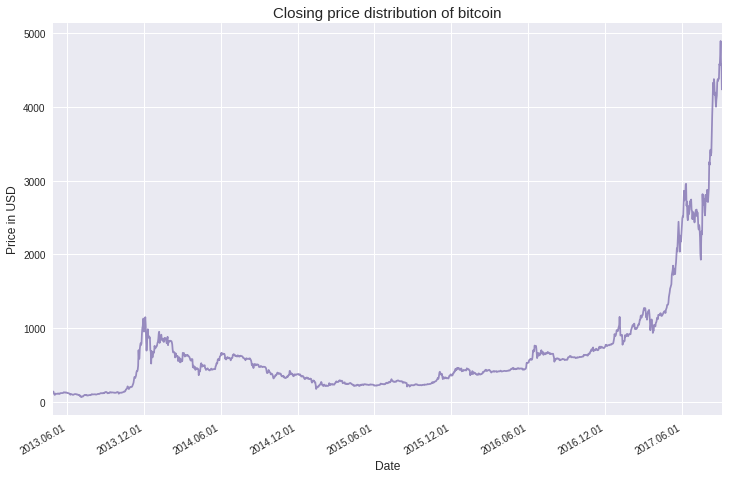

In [15]:
import matplotlib.dates as mdates
df['Date_mpl'] = df['Date'].apply(lambda x: mdates.date2num(x))

fig, ax = plt.subplots(figsize=(12,8))
sns.tsplot(df['Close'].values, time=df['Date_mpl'].values, alpha=0.8, color=color[3], ax=ax)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of bitcoin", fontsize=15)
plt.show()

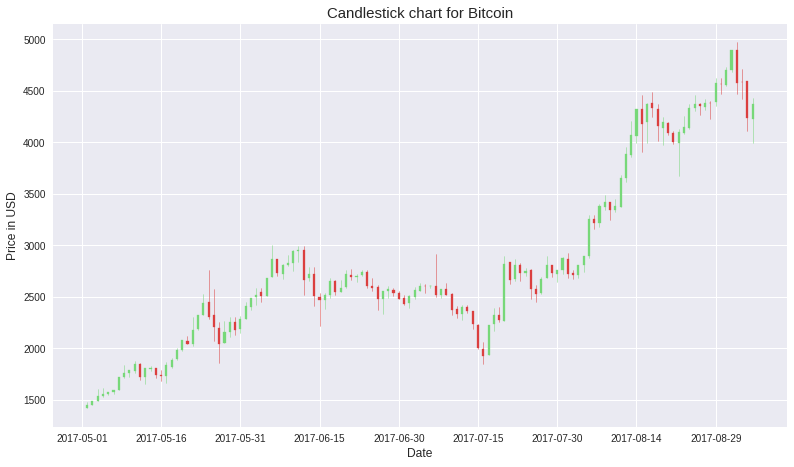

In [16]:
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc

fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot2grid((1,1), (0,0))

temp_df = df[df['Date']>'2017-05-01']
ohlc = []
for ind, row in temp_df.iterrows():
    ol = [row['Date_mpl'],row['Open'], row['High'], row['Low'], row['Close'], row['Volume']]
    ohlc.append(ol)
    
candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))

plt.xlabel("Date", fontsize=12)
plt.ylabel("Price in USD", fontsize=12)
plt.title("Candlestick chart for Bitcoin", fontsize=15)
plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
plt.show()

In [17]:
df = pd.read_csv('./Datasets/bitcoin_price.csv', parse_dates=['Date'], usecols=['Date','Close'])

In [18]:
df.columns = ["ds", "y"]

In [19]:
df = df.iloc[::-1]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 1591 to 0
Data columns (total 2 columns):
ds    1592 non-null datetime64[ns]
y     1592 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 25.0 KB


In [21]:
df = df[:1562]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 1591 to 30
Data columns (total 2 columns):
ds    1562 non-null datetime64[ns]
y     1562 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 24.5 KB


In [23]:
df.tail()

,ds,y
34,2017-08-02,2710.67
33,2017-08-03,2804.73
32,2017-08-04,2895.89
31,2017-08-05,3252.91
30,2017-08-06,3213.94


In [24]:
from fbprophet import Prophet

In [25]:
m = Prophet()
m.fit(df);
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1587,2017-09-01,2829.958126,2695.367812,2970.384772
1588,2017-09-02,2838.711053,2700.397841,2969.931712
1589,2017-09-03,2846.244845,2714.174022,2985.398285
1590,2017-09-04,2856.541650,2723.935187,2993.850367
1591,2017-09-05,2866.190877,2729.261354,3005.915655


In [26]:
#p = m.plot(forecast)

In [27]:
#p = m.plot_components(forecast)

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
forecast.columns

Index(['ds', 't', 'trend', 'seasonal_lower', 'seasonal_upper', 'trend_lower',
       'trend_upper', 'yhat_lower', 'yhat_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper', 'seasonal',
       'yhat'],
      dtype='object')

In [40]:
forecast.tail(30)[['ds','yhat']]

,ds,yhat
1562,2017-08-07,2731.238309
1563,2017-08-08,2736.379056
1564,2017-08-09,2736.980010
1565,2017-08-10,2741.983253
1566,2017-08-11,2741.083712
1567,2017-08-12,2743.463847
1568,2017-08-13,2744.369125
1569,2017-08-14,2747.965046
1570,2017-08-15,2751.023746
1571,2017-08-16,2750.164736
